<a href="https://colab.research.google.com/github/Namish1805/Weather_data_Analysis_202401100300149/blob/main/Weather_data_Analysis_202401100300149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


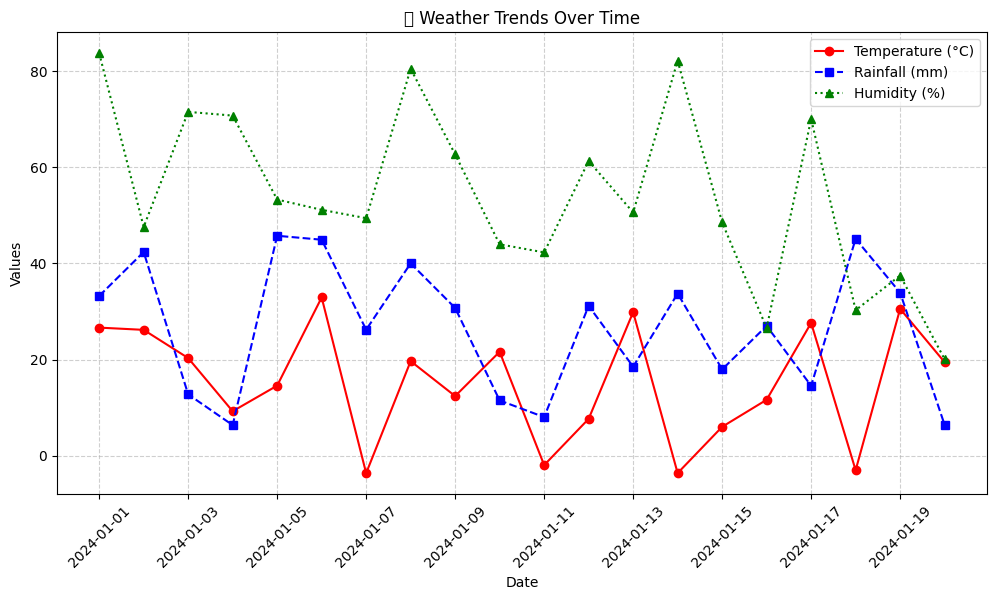

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


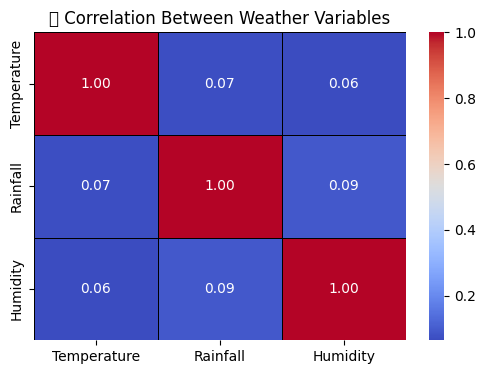

 No significant anomalies found.


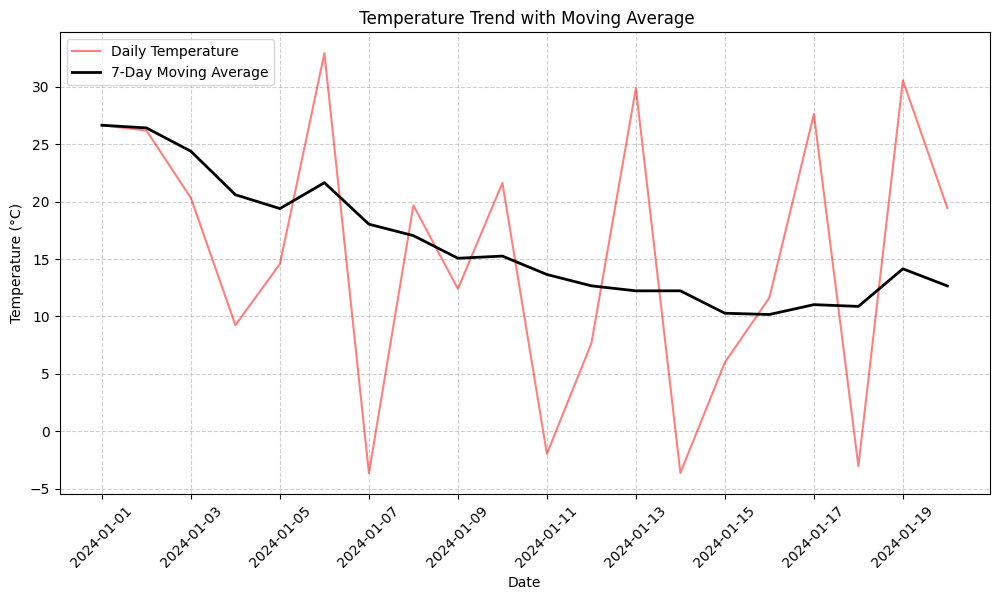

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Excel File
file_path = "/content/weather_data.csv"
df = pd.read_csv("/content/weather_data.csv")

# Convert Date column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

#  Handling Missing Values
df.fillna(df.mean(), inplace=True)

# Plot Weather Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperature"], label="Temperature (°C)", color="red", marker="o", linestyle="-")
plt.plot(df.index, df["Rainfall"], label="Rainfall (mm)", color="blue", marker="s", linestyle="dashed")
plt.plot(df.index, df["Humidity"], label="Humidity (%)", color="green", marker="^", linestyle="dotted")
plt.title("📈 Weather Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("🔗 Correlation Between Weather Variables")
plt.show()

#  Anomaly Detection Using Z-score
df_mean, df_std = df.mean(), df.std()
z_scores = (df - df_mean) / df_std
anomalies = df[(z_scores.abs() > 2).any(axis=1)]

#  Print Anomalies if Found
if not anomalies.empty:
    print("⚠ Anomalies Detected:\n", anomalies)
else:
    print(" No significant anomalies found.")

#  Moving Average Forecasting (7-day window)
df["Temperature_MA"] = df["Temperature"].rolling(window=7, min_periods=1).mean()

#  Plot Temperature with Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperature"], label="Daily Temperature", alpha=0.5, color="red")
plt.plot(df.index, df["Temperature_MA"], label="7-Day Moving Average", color="black", linewidth=2)
plt.title(" Temperature Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()